In [48]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os

In [49]:
directory = "Chessboard"
current_directory = os.getcwd()
chessboard_photos = []
for filename in os.listdir(directory):
    chessboard_photos.append(os.path.join(current_directory, directory, filename))

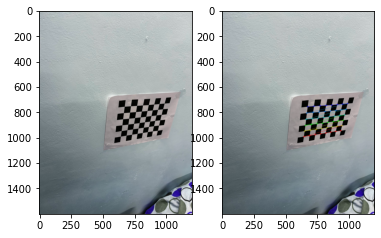

In [50]:
img = cv.imread(chessboard_photos[0])
plt.subplot(1, 2, 1)
plt.imshow(img)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

err, corners = cv.findChessboardCorners(gray, (8, 6), cv.CALIB_CB_ADAPTIVE_THRESH + cv.CALIB_CB_FAST_CHECK + cv.CALIB_CB_NORMALIZE_IMAGE)

if err == True:
    corners2 = cv.cornerSubPix(gray, corners, (15,15),(-1,-1), criteria)
    img = cv.drawChessboardCorners(img, (8, 6), corners2, err)
    plt.subplot(1, 2, 2)
    plt.imshow(img)
    plt.show()
else:
    print("No chessboard found")

Camera matrix : 

[[1.21472143e+03 0.00000000e+00 6.10099442e+02]
 [0.00000000e+00 1.21127066e+03 8.16648230e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[ 2.46900919e-01 -1.61124498e+00  1.19336358e-04  8.49755960e-03
   2.66532333e+00]]
r_vecs : 

(array([[ 0.45921024],
       [-0.44294233],
       [ 0.00552804]]), array([[ 0.47698722],
       [ 0.47647359],
       [-0.00728447]]), array([[ 0.41979376],
       [-0.03729097],
       [ 0.01073133]]), array([[ 0.08317143],
       [-0.04443999],
       [-0.02887828]]), array([[ 0.16298257],
       [ 0.77891966],
       [-0.06053814]]), array([[-0.36530607],
       [-0.42815055],
       [ 0.02475973]]), array([[-0.34158661],
       [-0.08971216],
       [-0.02236077]]), array([[ 0.71355746],
       [ 0.36467247],
       [-0.41417141]]), array([[0.70099403],
       [0.00308472],
       [0.00726717]]), array([[ 0.61752609],
       [-0.51664827],
       [ 0.17043738]]), array([[-0.32495967],
       [ 0.05783442],
       [ 

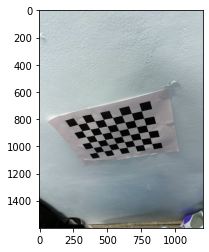

In [51]:
CHECKERBOARD = (8, 6)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
objpoints = []
imgpoints = [] 
 
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

for fname in chessboard_photos:
    img = cv.imread(fname)
    plt.imshow(img)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    err, corners = cv.findChessboardCorners(gray, CHECKERBOARD, cv.CALIB_CB_ADAPTIVE_THRESH + cv.CALIB_CB_FAST_CHECK + cv.CALIB_CB_NORMALIZE_IMAGE)
    
    objpoints.append(objp)
    corners2 = cv.cornerSubPix(gray, corners, (15,15),(-1,-1), criteria)
      
    imgpoints.append(corners2)

 
h,w = img.shape[:2]
 
err, matrx, dist, r_vecs, t_vecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
 
print("Camera matrix : \n")
print(matrx)
print("dist : \n")
print(dist)
print("r_vecs : \n")
print(r_vecs)
print("t_vecs : \n")
print(t_vecs)


In [52]:
# Q4 (a) Report the estimated intrinsic camera parameters, i.e., focal length(s), skew parameter and principal point along with error estimates if available.

print("Estimated intrinsic camera parameters:")
print("Focal Length (fx, fy):", matrx[0, 0], ",", matrx[1, 1])
print("Principal Point (cx, cy):", matrx[0, 2], ",", matrx[1, 2])
print("Skew Parameter:", matrx[0, 1])

# Check if error estimates are available
if err:
    print("\nError Estimates:")
    print("Mean Reprojection Error:", err)
else:
    print("\nError Estimates are not available.")


Estimated intrinsic camera parameters:
Focal Length (fx, fy): 1214.7214314111777 , 1211.2706569238699
Principal Point (cx, cy): 610.0994420566728 , 816.6482303418667
Skew Parameter: 0.0

Error Estimates:
Mean Reprojection Error: 0.9539568792251276


In [53]:
# Q4 (b) Report the estimated extrinsic camera parameters, i.e., rotation matrix and translation vector for each of the selected images.

print("Estimated extrinsic camera parameters:")
for i in range(len(chessboard_photos)):
    print("\nImage:", chessboard_photos[i])
    print("Rotation Matrix:")
    print(r_vecs[i])
    print("Translation Vector:")
    print(t_vecs[i])


Estimated extrinsic camera parameters:

Image: c:\Users\abhay\OneDrive\IIITD\Sem6\CV\2021508_HW2\Chessboard\WhatsApp Image 2024-03-21 at 20.56.16_66a1c26c.jpg
Rotation Matrix:
[[ 0.45921024]
 [-0.44294233]
 [ 0.00552804]]
Translation Vector:
[[ 1.12778675]
 [-1.100249  ]
 [21.75859038]]

Image: c:\Users\abhay\OneDrive\IIITD\Sem6\CV\2021508_HW2\Chessboard\WhatsApp Image 2024-03-21 at 20.56.16_e32d693a.jpg
Rotation Matrix:
[[ 0.47698722]
 [ 0.47647359]
 [-0.00728447]]
Translation Vector:
[[-6.22327284]
 [-2.2326046 ]
 [23.41007417]]

Image: c:\Users\abhay\OneDrive\IIITD\Sem6\CV\2021508_HW2\Chessboard\WhatsApp Image 2024-03-21 at 20.56.17_7a17e086.jpg
Rotation Matrix:
[[ 0.41979376]
 [-0.03729097]
 [ 0.01073133]]
Translation Vector:
[[-3.70565198]
 [ 0.9282804 ]
 [20.12908979]]

Image: c:\Users\abhay\OneDrive\IIITD\Sem6\CV\2021508_HW2\Chessboard\WhatsApp Image 2024-03-21 at 20.56.17_7a9bb3fc.jpg
Rotation Matrix:
[[ 0.08317143]
 [-0.04443999]
 [-0.02887828]]
Translation Vector:
[[-3.802451

Estimated radial distortion coefficients:
k1: 0.24690091940965378
k2: -1.6112449816224705

Undistorted Images:


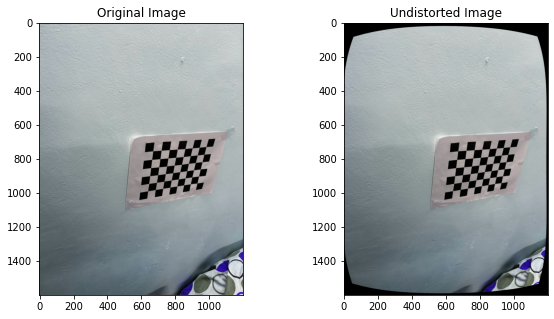

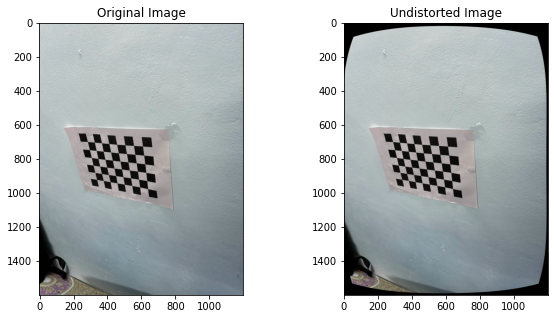

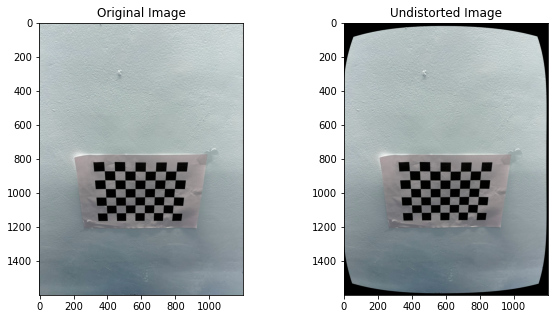

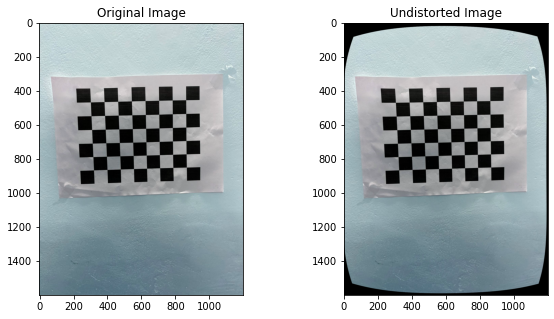

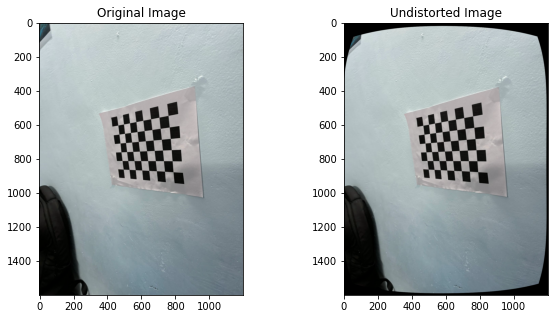

In [54]:
# Q4 (c) Report the estimated radial distortion coefficients. Use the radial distortion coefficients to undistort 5 of the raw images and include them in your report. Observe how straight lines at the corner of the images change upon application of the distortion coefficients. Comment briefly on this observation.

print("Estimated radial distortion coefficients:")
print("k1:", dist[0][0])
print("k2:", dist[0][1])

undistorted_images = []

print("\nUndistorted Images:")

for i in range(5):
    raw_img = cv.imread(chessboard_photos[i])
    undistorted_images.append(cv.undistort(raw_img, matrx, dist))
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(raw_img)
    plt.subplot(1, 2, 2)
    plt.title("Undistorted Image")
    plt.imshow(cv.undistort(raw_img, matrx, dist))
    plt.show()

Observation on straight lines at corners: Upon application of the distortion coefficients, straight lines at the corners of the images become less curved. This is because the radial distortion coefficients (k1 and k2) correct the radial distortion in the images caused by the camera lens. Straight lines that were previously bent outwards or inwards due to radial distortion are now straightened out in the undistorted images.

Re-projection error for each image:
Image 1: 0.11365122400615964
Image 2: 0.1111942051740495
Image 3: 0.0978318628197503
Image 4: 0.06586261363891953
Image 5: 0.12737163779047034
Image 6: 0.14043318622528794
Image 7: 0.12983523502659236
Image 8: 0.163643061914846
Image 9: 0.16834027830845633
Image 10: 0.14752411828181541
Image 11: 0.17207400831570538
Image 12: 0.18154211480990093
Image 13: 0.07557306646748004
Image 14: 0.15753724490979878
Image 15: 0.1349930133990652
Image 16: 0.14257436860124806
Image 17: 0.12429049522732542
Image 18: 0.1168185768708921
Image 19: 0.07086618710761262
Image 20: 0.033906105149903165
Image 21: 0.15731996968524067
Image 22: 0.09942222664744309
Image 23: 0.17420199508083667
Image 24: 0.17803423307094254
Image 25: 0.12213602037540766
Image 26: 0.14238280312617624
Image 27: 0.16123767319246954
Image 28: 0.1393309024853556
Image 29: 0.16938273833993256
Image 30: 0.16436802032927975


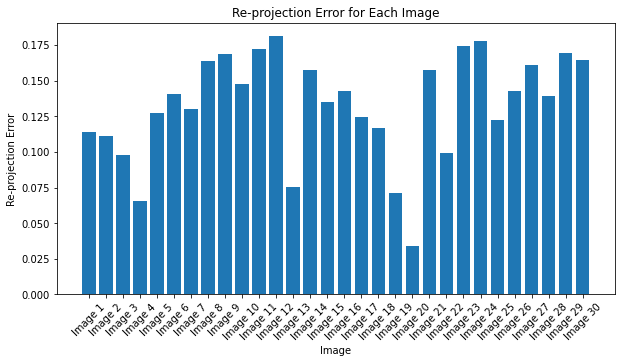


Mean Re-projection Error: 0.13278930621261212
Standard Deviation of Re-projection Error: 0.03641472284510578


In [55]:
# Q4 (d) Compute and report the re-projection error using the intrinsic and ex- trinsic camera parameters for each of the 25 selected images. Plot the error using a bar chart. Also report the mean and standard deviation of the re-projection error.

import numpy as np
reprojection_errors = []
for i in range(len(objpoints)):
    imgpoints_reprojected, _ = cv.projectPoints(objpoints[i], r_vecs[i], t_vecs[i], matrx, dist)
    imgpoints_float32 = imgpoints[i].reshape(-1, 1, 2).astype(np.float32) # Ensure format compatibility
    
    # Ensure the same number of points in both arrays
    min_length = min(len(imgpoints_float32), len(imgpoints_reprojected))
    imgpoints_float32 = imgpoints_float32[:min_length]
    imgpoints_reprojected = imgpoints_reprojected[:min_length]

    error = cv.norm(imgpoints_float32, imgpoints_reprojected, cv.NORM_L2) / min_length
    reprojection_errors.append(error)

# Report re-projection error for each image
print("Re-projection error for each image:")
for i, error in enumerate(reprojection_errors):
    print(f"Image {i+1}: {error}")

# Plot the re-projection error using a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(reprojection_errors)), reprojection_errors)
plt.xlabel('Image')
plt.ylabel('Re-projection Error')
plt.title('Re-projection Error for Each Image')
plt.xticks(range(len(reprojection_errors)), [f"Image {i+1}" for i in range(len(reprojection_errors))])
plt.xticks(rotation=45)
plt.show()

# Report mean and standard deviation of the re-projection error
mean_error = np.mean(reprojection_errors)
std_dev_error = np.std(reprojection_errors)
print("\nMean Re-projection Error:", mean_error)
print("Standard Deviation of Re-projection Error:", std_dev_error)


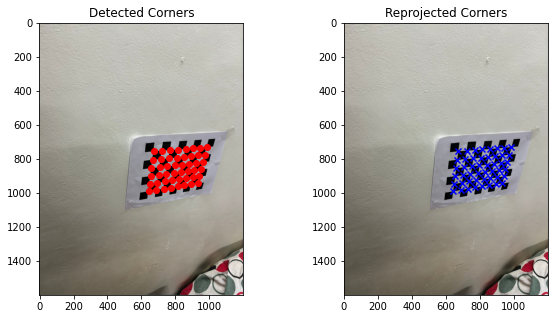

Re-projection error for image 1: 0.11365122400615964


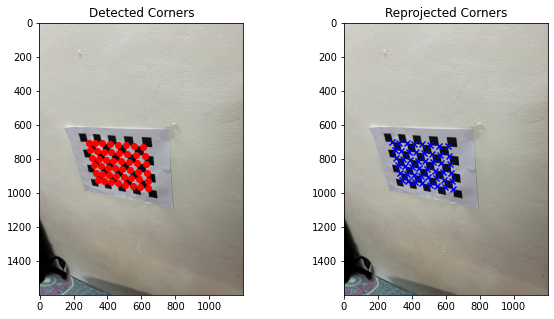

Re-projection error for image 2: 0.1111942051740495


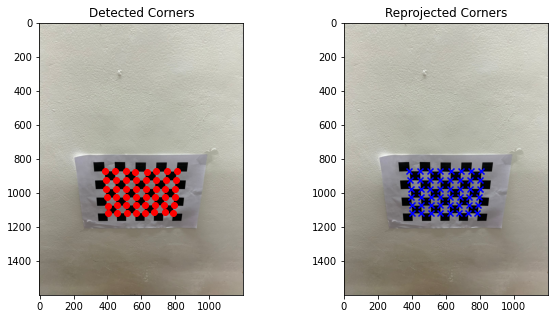

Re-projection error for image 3: 0.0978318628197503


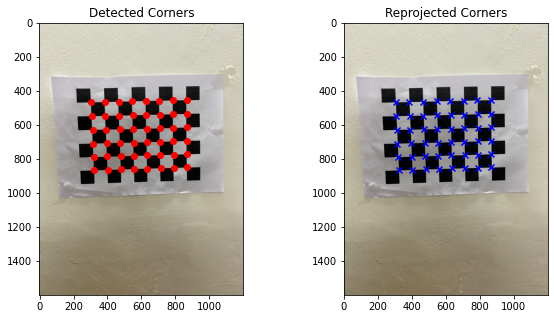

Re-projection error for image 4: 0.06586261363891953


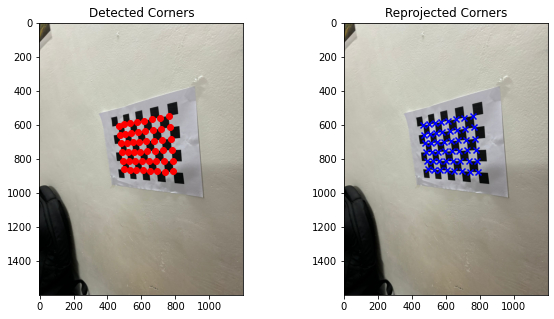

Re-projection error for image 5: 0.12737163779047034


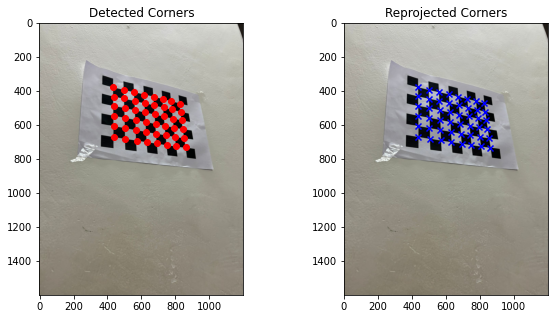

Re-projection error for image 6: 0.14043318622528794


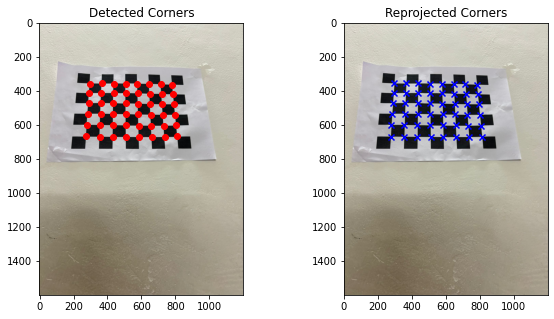

Re-projection error for image 7: 0.12983523502659236


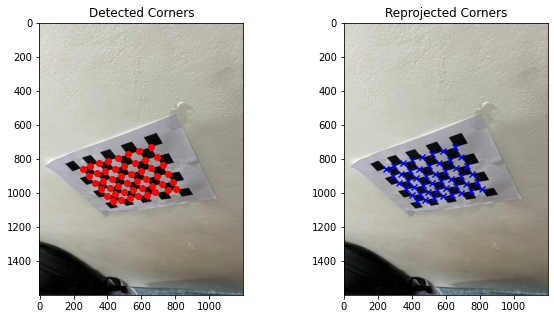

Re-projection error for image 8: 0.163643061914846


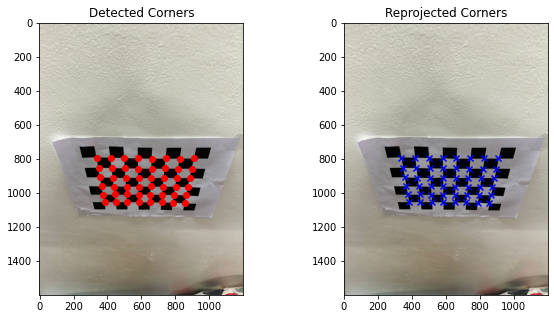

Re-projection error for image 9: 0.16834027830845633


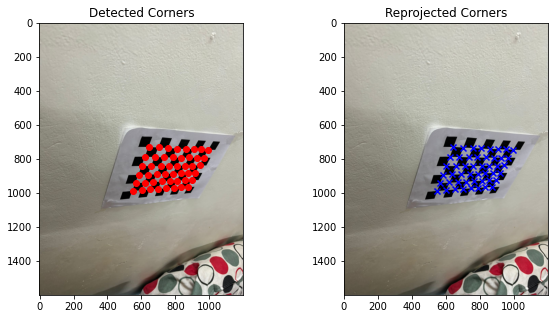

Re-projection error for image 10: 0.14752411828181541


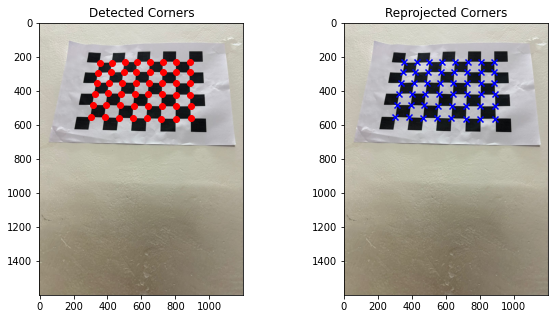

Re-projection error for image 11: 0.17207400831570538


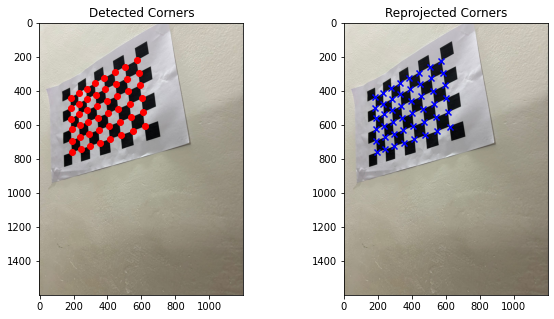

Re-projection error for image 12: 0.18154211480990093


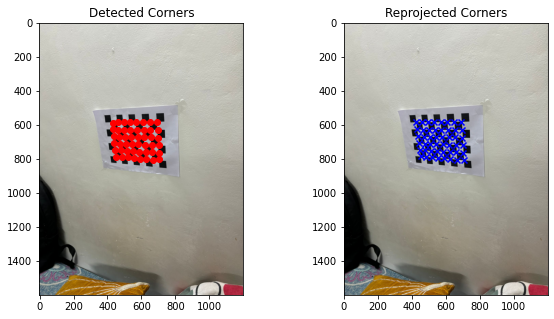

Re-projection error for image 13: 0.07557306646748004


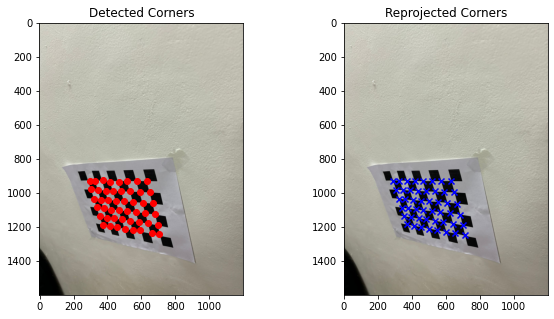

Re-projection error for image 14: 0.15753724490979878


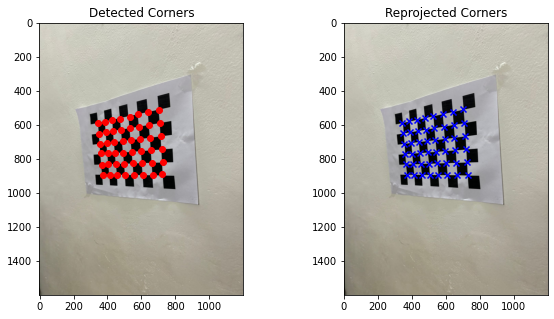

Re-projection error for image 15: 0.1349930133990652


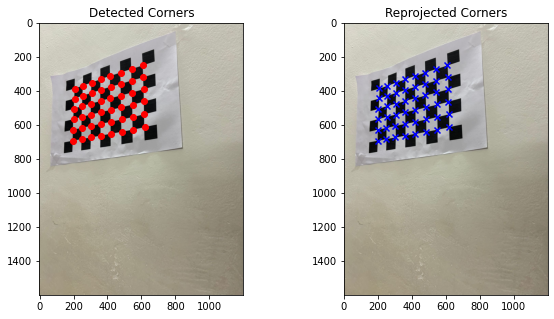

Re-projection error for image 16: 0.14257436860124806


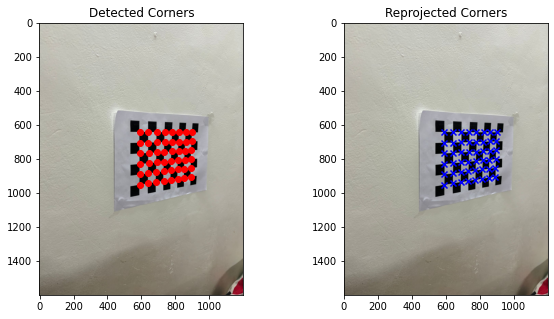

Re-projection error for image 17: 0.12429049522732542


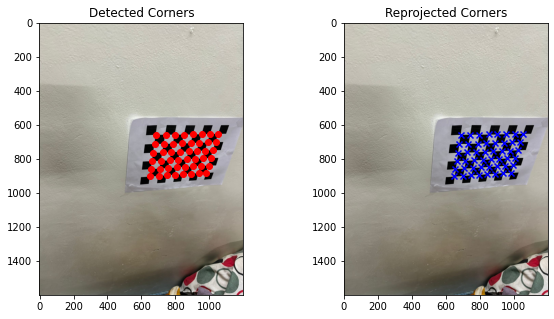

Re-projection error for image 18: 0.1168185768708921


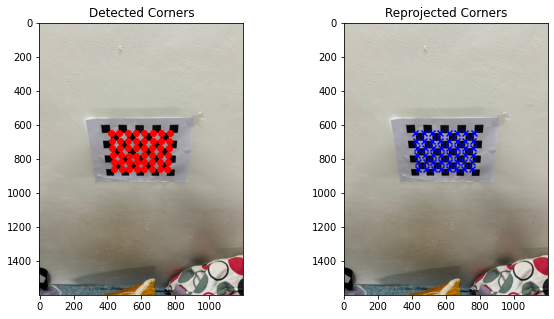

Re-projection error for image 19: 0.07086618710761262


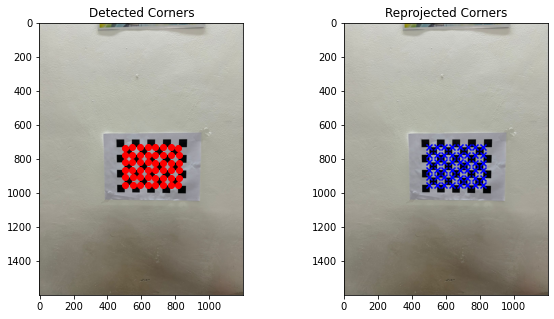

Re-projection error for image 20: 0.033906105149903165


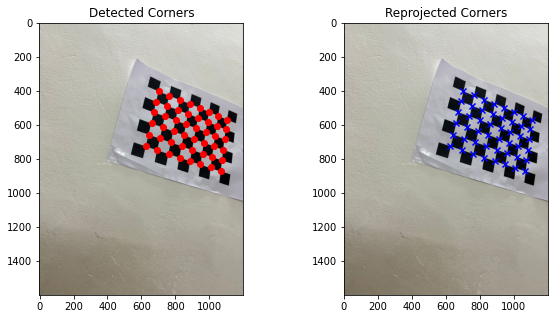

Re-projection error for image 21: 0.15731996968524067


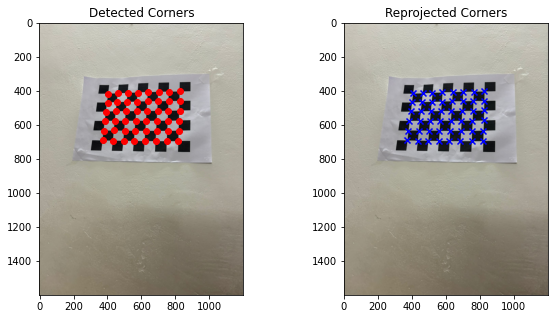

Re-projection error for image 22: 0.09942222664744309


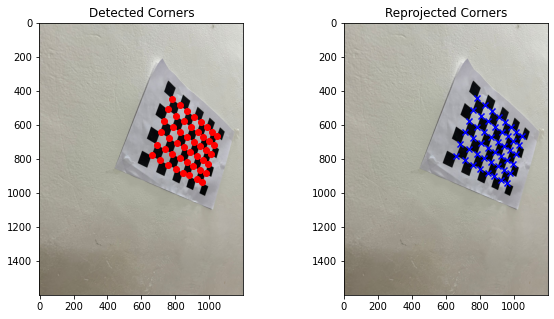

Re-projection error for image 23: 0.17420199508083667


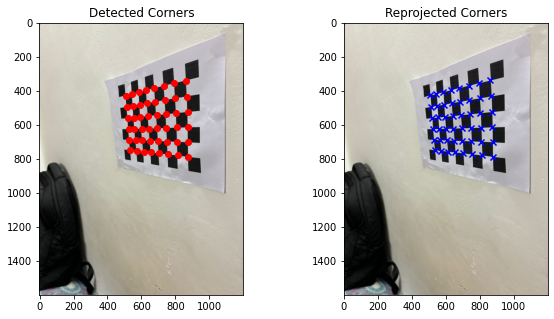

Re-projection error for image 24: 0.17803423307094254


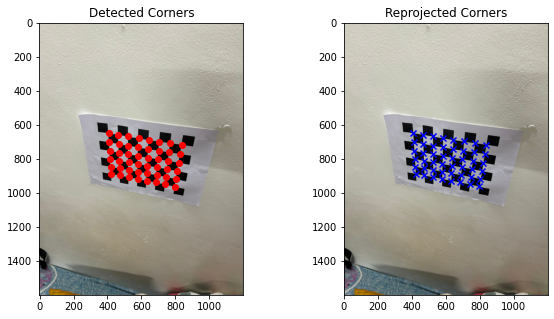

Re-projection error for image 25: 0.12213602037540766


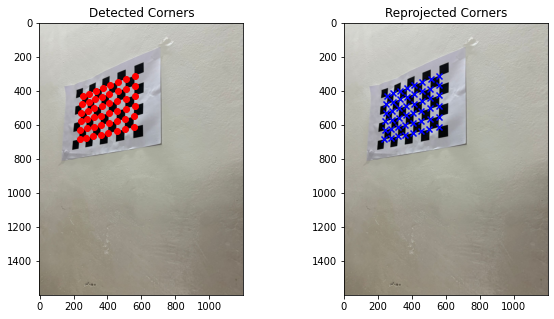

Re-projection error for image 26: 0.14238280312617624


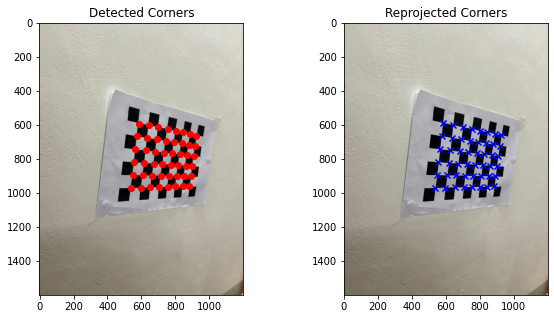

Re-projection error for image 27: 0.16123767319246954


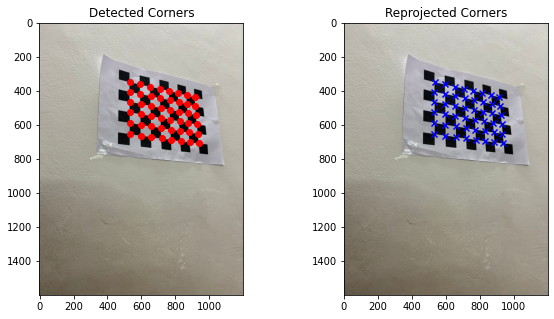

Re-projection error for image 28: 0.1393309024853556


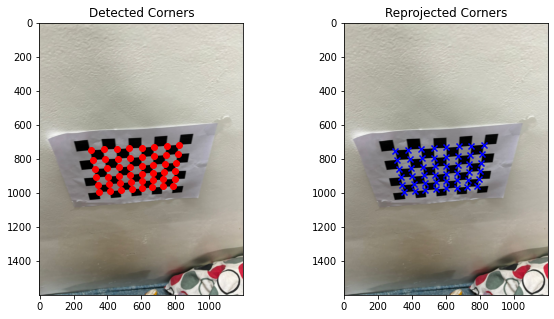

Re-projection error for image 29: 0.16938273833993256


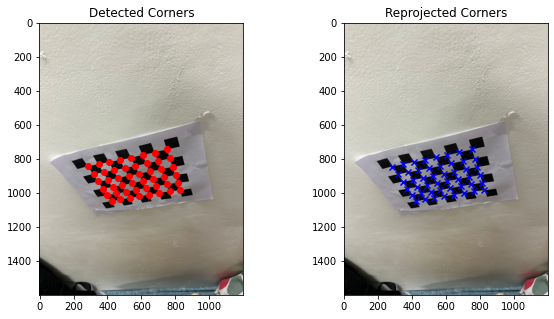

Re-projection error for image 30: 0.16436802032927975


In [56]:

def compute_reprojection_error(objpoints, r_vecs, t_vecs, matrx, dist):
    reprojection_errors = []
    for i in range(len(objpoints)):
        imgpoints_reprojected, _ = cv.projectPoints(objpoints[i], r_vecs[i], t_vecs[i], matrx, dist)
        imgpoints_float32 = imgpoints[i].reshape(-1, 1, 2).astype(np.float32) # Ensure format compatibility
        min_length = min(len(imgpoints_float32), len(imgpoints_reprojected))
        imgpoints_float32 = imgpoints_float32[:min_length]
        imgpoints_reprojected = imgpoints_reprojected[:min_length]
        error = cv.norm(imgpoints_float32, imgpoints_reprojected, cv.NORM_L2) / min_length
        reprojection_errors.append(error)
    return reprojection_errors

# Compute re-projection error for each image
reprojection_errors = compute_reprojection_error(objpoints, r_vecs, t_vecs, matrx, dist)

# Plot figures showing corners detected in the image along with the corners after re-projection
for i in range(len(chessboard_photos)):
    img_path = chessboard_photos[i]
    img = cv.imread(img_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    corners_detected = cv.findChessboardCorners(gray, CHECKERBOARD, None)[1]
    if corners_detected is not None:
        corners_detected = corners_detected.reshape(-1, 2)

        # Perform re-projection
        imgpoints_reprojected, _ = cv.projectPoints(objpoints[i], r_vecs[i], t_vecs[i], matrx, dist)
        imgpoints_reprojected = imgpoints_reprojected.reshape(-1, 2)

        # Plotting
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title('Detected Corners')
        plt.scatter(corners_detected[:, 0], corners_detected[:, 1], c='r', marker='o')
        plt.subplot(1, 2, 2)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title('Reprojected Corners')
        plt.scatter(imgpoints_reprojected[:, 0], imgpoints_reprojected[:, 1], c='b', marker='x')
        plt.show()
        print(f"Re-projection error for image {i+1}: {reprojection_errors[i]}")
    else:
        print(f"No corners detected in image {i+1}")

In [57]:
# Compute checkerboard plane normals for each image
checkerboard_plane_normals = []
for i in range(len(r_vecs)):
    rotation_matrix, _ = cv.Rodrigues(r_vecs[i])  # Convert rotation vector to rotation matrix
    checkerboard_plane_normal = rotation_matrix[:, 2]  # Extract the third column (normal) of the rotation matrix
    checkerboard_plane_normals.append(checkerboard_plane_normal)

# Print checkerboard plane normals
for i, normal in enumerate(checkerboard_plane_normals):
    print(f"Image {i+1} checkerboard plane normal (nCi) in the camera coordinate frame:")
    print(normal)

Image 1 checkerboard plane normal (nCi) in the camera coordinate frame:
[-0.41226757 -0.42986406  0.803276  ]
Image 2 checkerboard plane normal (nCi) in the camera coordinate frame:
[ 0.43951228 -0.44333101  0.7812084 ]
Image 3 checkerboard plane normal (nCi) in the camera coordinate frame:
[-0.0339768  -0.40766578  0.91249887]
Image 4 checkerboard plane normal (nCi) in the camera coordinate frame:
[-0.04556794 -0.08239551  0.9955574 ]
Image 5 checkerboard plane normal (nCi) in the camera coordinate frame:
[ 0.69414845 -0.16857551  0.69981443]
Image 6 checkerboard plane normal (nCi) in the camera coordinate frame:
[-0.41026398  0.34112553  0.84576406]
Image 7 checkerboard plane normal (nCi) in the camera coordinate frame:
[-0.08407203  0.33549425  0.93828328]
Image 8 checkerboard plane normal (nCi) in the camera coordinate frame:
[ 0.17917535 -0.69118478  0.70011413]
Image 9 checkerboard plane normal (nCi) in the camera coordinate frame:
[ 0.00528269 -0.64495996  0.76419811]
Image 10 c